Final Project
=============


Dataset: http://mlr.cs.umass.edu/ml/datasets/Wine+Quality
Data Source: http://mlr.cs.umass.edu/ml/datasets/Wine+Quality 
Dataset Description: http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality.names 


Project Questions
================

** What is the question you hope to answer? **

- Wine making is considered an art. But is there a formula for a quality wine?
- What basic properties are the formula for a good wine?
- Do white wine and red wine share the same formula?
- 


** What data are you planning to use to answer that question? **

- I'll be using both datasets. Conducting data analysis and apply ML models to each of the dataset.
- Keep all but 2 overlapping features.



** What do you know about the data so far? **

- The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent).

- The two original datasets are of different sizes (1599 vs 4898).

- For both original datasets, all columns consist of numnerical values. 

- No missing values for both original datasets.

- The combined master dataset has a sample size of 6497. The number is sufficient to support any ML model. 

** Why did you choose this topic? **

- Personal interest in wine. I'm trying to explore wine tasting as a hobby. 

**STEP 1. Clean and analyze the dataset**

In [1054]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sb

%matplotlib inline

Take a peek at the data

In [1055]:
!head -10 'winequality-white.csv'

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


In [1056]:
!head -10 'winequality-red.csv'

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [1057]:
#Load Data

#names=['fx_acd','vol_acd','cir_acd','res_sgr','chlor','fr_SO2','tl_SO2','den','pH','sulph','alchl','quality']

data_white = pd.read_csv('winequality-white.csv',sep=';',header=0)
data_red = pd.read_csv('winequality-red.csv',sep=';',header=0)

In [1058]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


In [1059]:
data_white.mean(axis=0)

fixed acidity            6.854788
volatile acidity         0.278241
citric acid              0.334192
residual sugar           6.391415
chlorides                0.045772
free sulfur dioxide     35.308085
total sulfur dioxide   138.360657
density                  0.994027
pH                       3.188267
sulphates                0.489847
alcohol                 10.514267
quality                  5.877909
dtype: float64

In [1060]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5


In [1061]:
data_red.mean(axis=0)

fixed acidity           8.319637
volatile acidity        0.527821
citric acid             0.270976
residual sugar          2.538806
chlorides               0.087467
free sulfur dioxide    15.874922
total sulfur dioxide   46.467792
density                 0.996747
pH                      3.311113
sulphates               0.658149
alcohol                10.422983
quality                 5.636023
dtype: float64

In [1062]:
data_red.shape

(1599, 12)

In [1063]:
data_white.shape

(4898, 12)

In [1064]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [1065]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 497.5 KB


In [1066]:
data_red.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [1067]:
data_white.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

I notice the gap in sample size between two datasets. One (red wine) with 1599 observations, one (white wine) with 4898. Since 1599 is quite a large sample size, I would not consider having 3X the size of one sample will have a material impact on the modelling results.

In [1068]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [1069]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Looking into the features:**

There are no missing values. What about outliers? I did some research into the attributes and the way they contribute to the complexity of wines and have the following findings:

[References: http://waterhouse.ucdavis.edu/whats-in-wine;
             http://winefolly.com/; http://winobrothers.com/2011/10/11/sulfur-dioxide-so2-in-wine/]



The expected level for some of the physiochemical attributes are:
 
1,500 - 14,500 mg/L tartaric acid;
0 - 500 mg/L citric acid;
0 - 3 g/L volatile acid;
10 - 350 mg/L sulphates;

However I find these range levels are still vague in terms of determining outliers. Reasons are: 

1) "The predominant fixed acids found in wines are tartaric, malic, citric, and succinic." Looks like there are some overlapping between fixed acidity and citric acid here. Same overlapping effect occurs between free sulfur dioxide and total sulfur dioxide.

2) Wine making is an art. There are no absoluteness on certain physiochemical levels except for country-specific wine making laws, whose effect is eliminated here since all the wine samples were taken from Portugal. That is to say, each component's level range really depends on enologists' preferences. 




What to do next:

1) Drop overlapping features, particularly, citric acid and free sulfur dioxide.

2) Detect the noises in the datasets from a visual perspective.

3) Reassign values to 'quality' column, i.e. make it a binary feature, good quality (score>5) vs bad quality (score <=5).


In [1070]:
#Create a function that differentiate good quality wine (with value 1) from bad quality wine (with value 0)

def numeric_to_binary(x):
    if x >5:
        return 1
    else:
        return 0


In [1071]:
data_white = data_white.drop(['citric acid','free sulfur dioxide'],axis=1)

In [1072]:
data_white['bin_quality'] = data_white['quality'].apply(numeric_to_binary)
#data_white.drop(['quality'],axis=1)

data_white.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bin_quality
0,7.000000,0.270000,20.700000,0.045000,170.000000,1.001000,3.000000,0.450000,8.800000,6,1
1,6.300000,0.300000,1.600000,0.049000,132.000000,0.994000,3.300000,0.490000,9.500000,6,1
2,8.100000,0.280000,6.900000,0.050000,97.000000,0.995100,3.260000,0.440000,10.100000,6,1
3,7.200000,0.230000,8.500000,0.058000,186.000000,0.995600,3.190000,0.400000,9.900000,6,1
4,7.200000,0.230000,8.500000,0.058000,186.000000,0.995600,3.190000,0.400000,9.900000,6,1


In [1073]:
data_red = data_red.drop(['citric acid','free sulfur dioxide'],axis=1)

In [1074]:
data_red['bin_quality'] = data_red['quality'].apply(numeric_to_binary)
#data_white.drop(['quality'],axis=1)

data_red.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,bin_quality
0,7.400000,0.700000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0
1,7.800000,0.880000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000,5,0
2,7.800000,0.760000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000,5,0
3,11.200000,0.280000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000,6,1
4,7.400000,0.700000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000,5,0


In [1075]:
white = pd.DataFrame(data_white.mean(axis=0))

white.columns=['White']

white

,White
fixed acidity,6.854788
volatile acidity,0.278241
residual sugar,6.391415
chlorides,0.045772
total sulfur dioxide,138.360657
density,0.994027
pH,3.188267
sulphates,0.489847
alcohol,10.514267
quality,5.877909


In [1076]:
red=pd.DataFrame(data_red.mean(axis=0))

red.columns=['Red']

red

,Red
fixed acidity,8.319637
volatile acidity,0.527821
residual sugar,2.538806
chlorides,0.087467
total sulfur dioxide,46.467792
density,0.996747
pH,3.311113
sulphates,0.658149
alcohol,10.422983
quality,5.636023


In [1077]:
wr=pd.concat([white, red], axis=1)

wr

,White,Red
fixed acidity,6.854788,8.319637
volatile acidity,0.278241,0.527821
residual sugar,6.391415,2.538806
chlorides,0.045772,0.087467
total sulfur dioxide,138.360657,46.467792
density,0.994027,0.996747
pH,3.188267,3.311113
sulphates,0.489847,0.658149
alcohol,10.514267,10.422983
quality,5.877909,5.636023


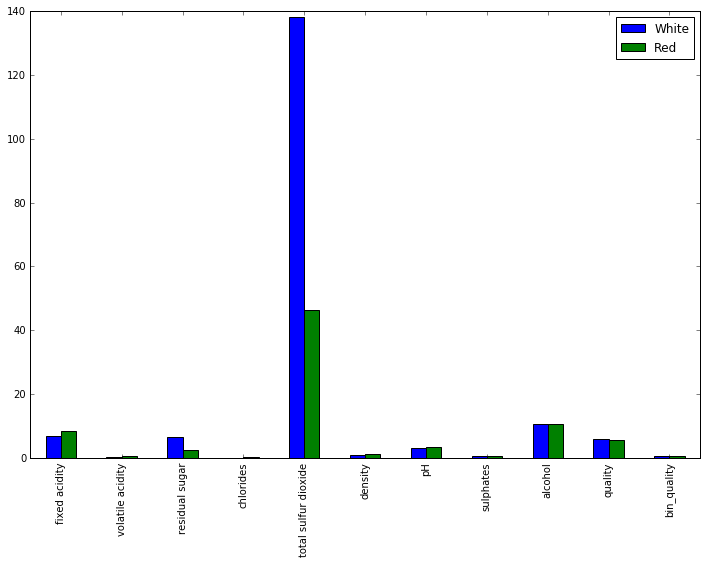

In [1078]:
white_red = pd.DataFrame(wr, columns=['White','Red'])

white_red.plot(kind='bar',figsize=(12,8));

In [1079]:
#The features are on different measuring scales, e.g. g/L, mg/L. It needs to be scaled first. 

from sklearn.preprocessing import StandardScaler

red_q = data_red['bin_quality']
red_X = data_red.drop(['quality','bin_quality'], axis=1)

white_q = data_white['bin_quality']
white_X = data_white.drop(['quality','bin_quality'], axis=1)

stdsc = StandardScaler()

red_X_std = stdsc.fit_transform(red_X)
white_X_std = stdsc.fit_transform(white_X)

#red_q_std = stdsc.fit_transform(red_X)
#white_q_std = stdsc.fit_transform(white_X)

In [1080]:
white_X_std = pd.DataFrame(white_X_std,columns = white_X.columns)
red_X_std = pd.DataFrame(red_X_std,columns = red_X.columns)

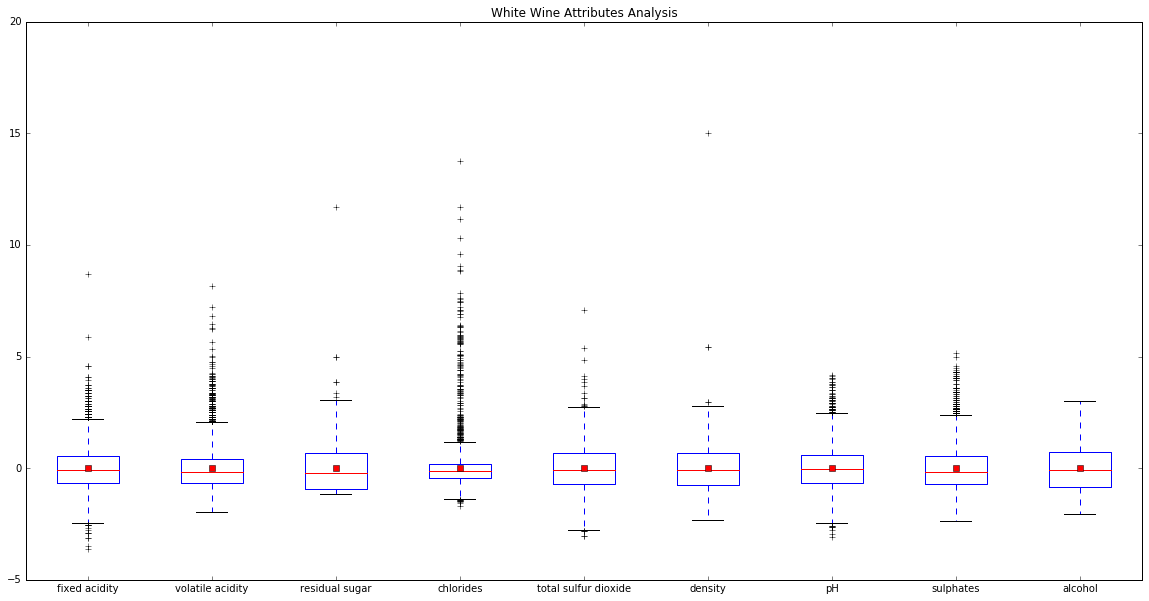

In [1081]:
a= white_X_std.plot(kind='box',showmeans=True,figsize=(20,10));

plt.title('White Wine Attributes Analysis')

plt.show()


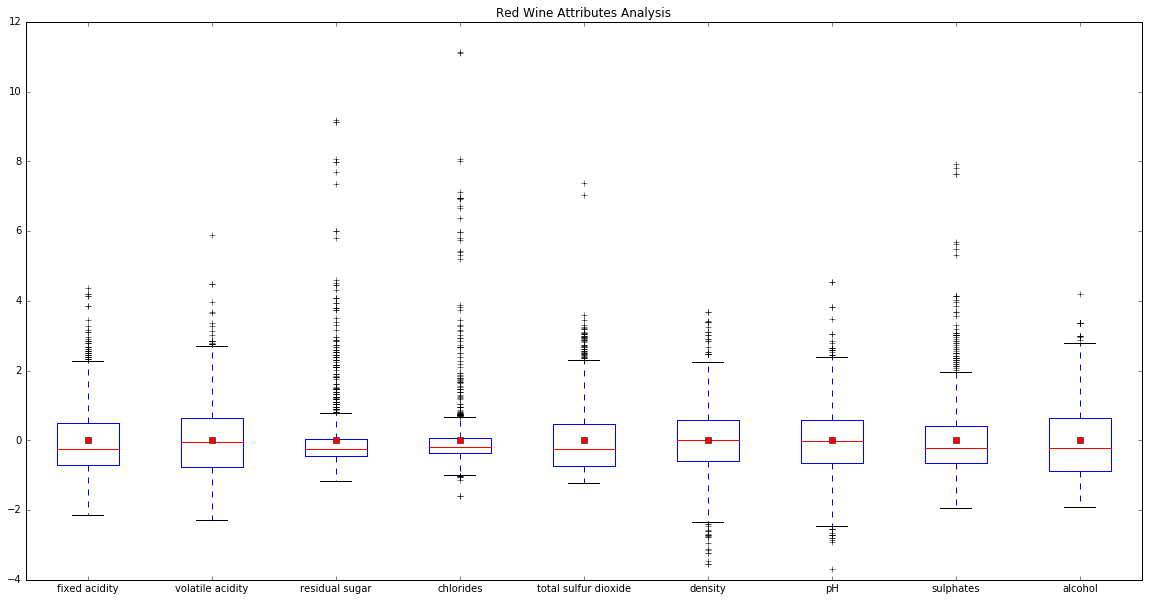

In [1082]:
red_X_std.plot(kind='box',showmeans=True,figsize=(20,10));

plt.title('Red Wine Attributes Analysis')

plt.show()

Based on the above two box plots, there are some noticeable outlying values among features. Again, winemaking process totally depends on what enologists tend to do. Actually I believe it is this wide range of The hard line for 'outliers' is not that 'hard'. I'm not gonna drop these 'outliers' off the dataset but they surely will contribute to the source of errors when applying regression modelling. 

In [1083]:
#Take a look at the feature correlations

red_X_std.corr()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.114777,0.093705,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,0.001918,0.061298,0.076470,0.022026,0.234937,-0.260987,-0.202288
residual sugar,0.114777,0.001918,1.000000,0.055610,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.055610,1.000000,0.047400,0.200632,-0.265026,0.371260,-0.221141
total sulfur dioxide,-0.113181,0.076470,0.203028,0.047400,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.355283,0.200632,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.085652,-0.265026,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.005527,0.371260,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.061668,-0.202288,0.042075,-0.221141,-0.205654,-0.496180,0.205633,0.093595,1.000000


In [1084]:
white_X_std.corr()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.089021,0.023086,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,0.064286,0.070512,0.089261,0.027114,-0.031915,-0.035728,0.067718
residual sugar,0.089021,0.064286,1.000000,0.088685,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.088685,1.000000,0.198910,0.257211,-0.090439,0.016763,-0.360189
total sulfur dioxide,0.091070,0.089261,0.401439,0.198910,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.838966,0.257211,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.194133,-0.090439,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,-0.026664,0.016763,0.134562,0.074493,0.155951,1.000000,-0.017433
alcohol,-0.120881,0.067718,-0.450631,-0.360189,-0.448892,-0.780138,0.121432,-0.017433,1.000000


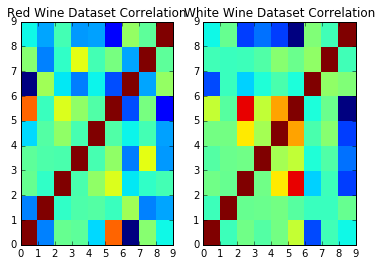

In [1085]:
plt.subplot(121)
plt.title('Red Wine Dataset Correlation')
heatmap = plt.pcolor(red_X_std.corr())

plt.subplot(122)
plt.title('White Wine Dataset Correlation')
heatmap = plt.pcolor(white_X_std.corr())


By looking at the correlations among features, 

 - In red wine dataset, fixed acidity is correlated to a certain degree with density.
 - In white wine dataset, there is strong correlation between residual sugar and density.

**STEP 2. Apply Supervised Learning Models**

In [1086]:
#Split the data into training and test sets

from sklearn.cross_validation import train_test_split


X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(red_X_std, red_q, 
                                                    test_size=0.2, random_state=7)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(white_X_std, white_q, 
                                                    test_size=0.2, random_state=7)

In [1087]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='uniform', random_state=None, constant=None)

In [1088]:
from sklearn.cross_validation import cross_val_score

dc.fit(X_train_r, y_train_r)
dc.fit(X_train_w, y_train_w)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

In [1089]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

metrics1 = list(precision_recall_fscore_support(dc.predict(X_test_r), y_test_r, average='binary'))[:3]
metrics1.append(accuracy_score(dc.predict(X_test_r), y_test_r))

In [1090]:
t1 = %timeit -o dc.fit(X_train_r, y_train_r)

The slowest run took 4.67 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 103 µs per loop


In [1091]:
metrics1.append(t1.best)

In [1092]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

print 'Metrics for Red Wine'

model_stats1 = pd.DataFrame(metrics1,columns=['dummy_r'],index=['precision','recall','fscore','accuracy','time'])
model_stats1

Metrics for Red Wine


,dummy_r
precision,0.545455
recall,0.618182
fscore,0.579545
accuracy,0.450000
time,0.000103


In [1093]:
metrics2 = list(precision_recall_fscore_support(dc.predict(X_test_w), y_test_w, average='binary'))[:3]
metrics2.append(accuracy_score(dc.predict(X_test_w), y_test_w))

In [1094]:
t2 = %timeit -o dc.fit(X_train_w, y_train_w)

1000 loops, best of 3: 184 µs per loop


In [1095]:
metrics2.append(t2.best)

In [1096]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

print 'Metrics for White Wine'

model_stats2 = pd.DataFrame(metrics2,columns=['dummy_w'],index=['precision','recall','fscore','accuracy','time'])
model_stats2

Metrics for White Wine


,dummy_w
precision,0.471756
recall,0.657447
fscore,0.549333
accuracy,0.481633
time,0.000184


In [1097]:
benchmark1=cross_val_score(dc,X_train_r, y_train_r, cv=20)

benchmark1

array([ 0.53846154,  0.52307692,  0.56923077,  0.58461538,  0.47692308,
        0.44615385,  0.43076923,  0.49230769,  0.546875  ,  0.515625  ,
        0.546875  ,  0.53968254,  0.47619048,  0.47619048,  0.46031746,
        0.50793651,  0.36507937,  0.44444444,  0.49206349,  0.55555556])

In [1098]:
benchmark1.mean()

0.49941868894993896

In [1099]:
benchmark2=cross_val_score(dc,X_train_w, y_train_w, cv=20)

benchmark2

array([ 0.47715736,  0.52284264,  0.53807107,  0.51020408,  0.43367347,
        0.50510204,  0.50510204,  0.4744898 ,  0.56632653,  0.53571429,
        0.48469388,  0.5255102 ,  0.5       ,  0.49489796,  0.51020408,
        0.54358974,  0.46666667,  0.50769231,  0.5025641 ,  0.47692308])

In [1100]:
benchmark2.mean()

0.50407126653863421

**Benchmark**

Red Wine: 50.8% accuracy, 58% F1 score.

White Wine: 50.2% accuracy, 47% F1 score.

Apply Logistic Regression with L2 - Ridge Regularization

In [1101]:
from sklearn.cross_validation import ShuffleSplit

cv1 = ShuffleSplit(X_train_r.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv2 = ShuffleSplit(X_train_w.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [1102]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr2 = LogisticRegression()

parameters_lr = {'penalty': ['l2'], 'C':np.linspace(0.1,2.0,50)}



In [1103]:
from sklearn.grid_search import GridSearchCV

clf1 = GridSearchCV(lr1, parameters_lr, cv=cv1)
clf2 = GridSearchCV(lr2, parameters_lr, cv=cv2)

clf1.fit(X_train_r, y_train_r)
clf2.fit(X_train_w, y_train_w)

GridSearchCV(cv=ShuffleSplit(3918, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'C': array([ 0.1    ,  0.13878,  0.17755,  0.21633,  0.2551 ,  0.29388,
        0.33265,  0.37143,  0.4102 ,  0.44898,  0.48776,  0.52653,
        0.56531,  0.60408,  0.64286,  0.68163,  0.72041,  0.75918,
        0.79796,  0.83673,  0.87551,  0.91429,  0.95306,  0.991...98 ,
        1.72857,  1.76735,  1.80612,  1.8449 ,  1.88367,  1.92245,
        1.96122,  2.     ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1104]:
clf1.best_params_

{'C': 0.29387755102040813, 'penalty': 'l2'}

In [1105]:
clf2.best_params_

{'C': 0.7204081632653061, 'penalty': 'l2'}

In [1106]:
best_lr1 = clf1.best_estimator_
best_lr2 = clf2.best_estimator_

In [1107]:
metrics1 = list(precision_recall_fscore_support(best_lr1.predict(X_test_r), y_test_r, average='binary'))[:3]
metrics1.append(accuracy_score(best_lr1.predict(X_test_r), y_test_r))

In [1108]:
t1 = %timeit -o best_lr1.fit(X_train_r, y_train_r)

100 loops, best of 3: 2.06 ms per loop


In [1109]:
metrics1.append(t1.best)
model_stats1['logreg_r'] = metrics1

In [1110]:
model_stats1

,dummy_r,logreg_r
precision,0.545455,0.775401
recall,0.618182,0.796703
fscore,0.579545,0.785908
accuracy,0.450000,0.753125
time,0.000103,0.002057


Logistic Regression model for Red Wine achieve 75.3% accuracy and 78.6% in F1 score, beating the benchmark.

In [1111]:
metrics2 = list(precision_recall_fscore_support(best_lr2.predict(X_test_w), y_test_w, average='binary'))[:3]
metrics2.append(accuracy_score(best_lr2.predict(X_test_w), y_test_w))

In [1112]:
t2 = %timeit -o best_lr2.fit(X_train_w, y_train_w)

100 loops, best of 3: 6.73 ms per loop


In [1113]:
metrics2.append(t2.best)
model_stats2['logreg_w'] = metrics2

In [1114]:
model_stats2

,dummy_w,logreg_w
precision,0.471756,0.883969
recall,0.657447,0.793151
fscore,0.549333,0.836101
accuracy,0.481633,0.768367
time,0.000184,0.006731


Logistic Regression model for White Wine achieve 76.8% accuracy and 83.6% in F1 score, beating the benchmark.

Logistic Regression Learning Curve for Red Wine


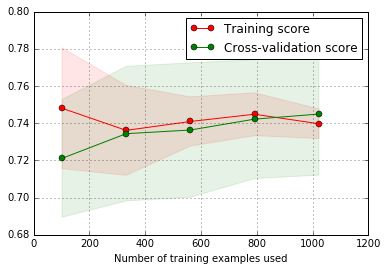

In [1115]:
from sk_modelcurves.learning_curve import draw_learning_curve

print 'Logistic Regression Learning Curve for Red Wine'

draw_learning_curve(best_lr1,X_train_r, y_train_r, cv=cv1);

The Logistic Regression model shows little variance; accuracy improves with more training data but still not to a satisfactory level.

Logistic Regression Learning Curve for White Wine


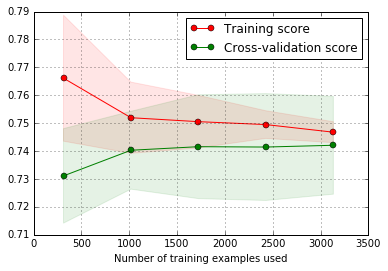

In [1116]:
print 'Logistic Regression Learning Curve for White Wine'

draw_learning_curve(best_lr2,X_train_w, y_train_w, cv=cv2);

The Logistic Regression model shows some variance and high bias, and not score high on accuracy. 

In [1117]:
#Coefficients for Quality Red Wine Formula

pd.DataFrame({'features': red_X.columns, 'coefs': best_lr1.coef_[0]}).sort_values(by='coefs',ascending=False)

,coefs,features
8,0.803582,alcohol
7,0.471617,sulphates
0,0.211676,fixed acidity
2,0.157982,residual sugar
6,-0.035926,pH
3,-0.230476,chlorides
5,-0.252267,density
4,-0.428496,total sulfur dioxide
1,-0.432927,volatile acidity


For red wine, alcohol seems to be the biggest contributor to the quality, with sulphates, total sulfur dioxide and volatile acidity as co-factors, while the effects from sulphates and total sulfur dioxide might offset each other.

In [1118]:
#Coefficients for Quality White Wine Formula

pd.DataFrame({'features': white_X.columns, 'coefs': best_lr2.coef_[0]}).sort_values(by='coefs',ascending=False)

,coefs,features
8,0.918485,alcohol
2,0.834318,residual sugar
7,0.216049,sulphates
6,0.140600,pH
4,0.017512,total sulfur dioxide
3,0.007249,chlorides
0,-0.017643,fixed acidity
1,-0.643736,volatile acidity
5,-0.754739,density


For white wine, alcohol and residual sugar play huge part in the wine quality, with density and volatile acidity having adverse contributions to the overall quality.

Apply Random Forest Model

In [1119]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=1)
rf2 = RandomForestClassifier(random_state=1)

In [1120]:
rf1.fit(X_train_r, y_train_r)
rf2.fit(X_train_w, y_train_w)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [1121]:
features = red_X_std.columns
feature_importances = rf1.feature_importances_

features_red = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_red.sort_values('Importance Score', inplace=True, ascending=False)

features_red

,Features,Importance Score
8,alcohol,0.207927
1,volatile acidity,0.137989
7,sulphates,0.134596
4,total sulfur dioxide,0.118812
5,density,0.097026
3,chlorides,0.093855
0,fixed acidity,0.078134
6,pH,0.071055
2,residual sugar,0.060607


Top features contribute to quality red wine are: alcohol, volatile acidity, sulphates and total sulfur dioxide. 

In [1122]:
features = white_X_std.columns
feature_importances = rf2.feature_importances_

features_white = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_white.sort_values('Importance Score', inplace=True, ascending=False)

features_white

,Features,Importance Score
8,alcohol,0.182059
1,volatile acidity,0.145844
5,density,0.109994
2,residual sugar,0.108244
4,total sulfur dioxide,0.107128
3,chlorides,0.103770
6,pH,0.088545
0,fixed acidity,0.077955
7,sulphates,0.076462


Top features contribute to quality white wine are: alcohol, volatile acidity, density, residual sugar and total sulfur dioxide.

The importance score results are consistent with what we observe in Logistic Regression Coeeficient table.

In [1123]:
parameters_rf = {'n_estimators':range(1,10,1)}

clf1 = GridSearchCV(rf1, parameters_rf)
clf1.fit(X_train_r, y_train_r)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1124]:
clf2 = GridSearchCV(rf2, parameters_rf)
clf2.fit(X_train_w, y_train_w)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1125]:
clf1.best_params_

{'n_estimators': 5}

In [1126]:
clf2.best_params_

{'n_estimators': 9}

In [1127]:
best_rf1 = clf1.best_estimator_
best_rf2 = clf2.best_estimator_

print classification_report(best_rf1.predict(X_test_r), y_test_r)
score1 = cross_val_score(best_rf1, X_train_r, y_test_r, cv=cv1)
print('CV score {}, Average score {}'.format(score1, score1.mean()))
best_rf1.score(X_test_r, y_test_r)

print classification_report(best_rf2.predict(X_test_w), y_test_w)
score2 = cross_val_score(best_rf2, X_train_w, y_test_w, cv=cv2)
print('CV score {}, Average score {}'.format(score2, score2.mean()))
best_rf2.score(X_test_w, y_test_w)

In [1128]:
t1 = %timeit -o best_rf1.fit(X_train_r, y_train_r)

10 loops, best of 3: 19.3 ms per loop


In [1129]:
t2 = %timeit -o best_rf2.fit(X_train_w, y_train_w)

10 loops, best of 3: 66.5 ms per loop


Random Forest Learning Curve for Red Wine


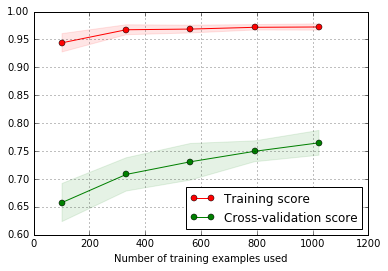

In [1130]:
print 'Random Forest Learning Curve for Red Wine'

draw_learning_curve(best_rf1,X_train_r, y_train_r, cv=cv1);

Random Forest Learning Curve for White Wine


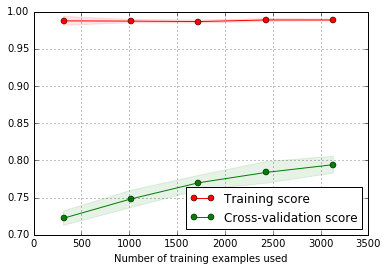

In [1131]:
print 'Random Forest Learning Curve for White Wine'

draw_learning_curve(best_rf2,X_train_w, y_train_w, cv=cv2);

High variance has been observed in both learning curves, which means the model is overfitting. 

**Unsupervised Learning**

Apply k-Mean Clustering

In [1132]:
#white_qb=data_white[['quality','bin_quality']]
#red_qb=data_red[['quality','bin_quality']]

data_white = data_white.drop(['quality'],axis=1)
data_red = data_red.drop(['quality'],axis=1)


In [1133]:
white_scale = stdsc.fit_transform(data_white)

red_scale = stdsc.fit_transform(data_red)

In [1134]:
white_scale = pd.DataFrame(white_scale,columns=data_white.columns)

white_scale.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality
0,0.172097,-0.081770,2.821349,-0.035355,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.709490
1,-0.657501,0.215896,-0.944765,0.147747,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.709490
2,1.475751,0.017452,0.100282,0.193523,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.709490
3,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.709490
4,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.709490


In [1135]:
red_scale = pd.DataFrame(red_scale,columns=data_red.columns)

red_scale.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality
0,-0.528360,0.961877,-0.453218,-0.243707,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-1.072004
1,-0.298547,1.967442,0.043416,0.223875,0.624363,0.028261,-0.719933,0.128950,-0.584777,-1.072004
2,-0.298547,1.297065,-0.169427,0.096353,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-1.072004
3,1.654856,-1.384443,-0.453218,-0.264960,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.932832
4,-0.528360,0.961877,-0.453218,-0.243707,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-1.072004


In [1136]:
#white = pd.concat([white_scale,white_qb], axis=1)
#red = pd.concat([red_scale,red_qb], axis=1)

In [1137]:
#Add one column to each dataset so they can be identified after the merge.

#Type 1 is White Wine; Type 2 is Red Wine.

white_scale['type']=1
red_scale['type']=0



In [1138]:
white_scale.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality,type
0,0.172097,-0.081770,2.821349,-0.035355,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.709490,1
1,-0.657501,0.215896,-0.944765,0.147747,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.709490,1
2,1.475751,0.017452,0.100282,0.193523,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.709490,1
3,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.709490,1
4,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.709490,1


In [1139]:
#Concatenate two original datasets

wine = pd.concat([white_scale,red_scale],axis=0)

#Take a look at the new dataset

wine.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality,type
0,0.172097,-0.081770,2.821349,-0.035355,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.709490,1
1,-0.657501,0.215896,-0.944765,0.147747,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.709490,1
2,1.475751,0.017452,0.100282,0.193523,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.709490,1
3,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.709490,1
4,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.709490,1


In [1140]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 11 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
bin_quality             6497 non-null float64
type                    6497 non-null int64
dtypes: float64(10), int64(1)
memory usage: 609.1 KB


In [1141]:
wine.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.753886
std,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,0.430779
min,-3.620351,-2.278280,-1.162696,-1.683274,-3.044230,-3.538731,-3.700401,-2.364709,-2.043297,-1.409463,0.000000
25%,-0.657501,-0.677101,-0.816599,-0.447335,-0.714474,-0.738104,-0.655141,-0.697233,-0.866379,-1.409463,1.000000
50%,-0.068735,-0.155419,-0.240375,-0.158692,-0.135861,-0.076030,-0.054751,-0.173921,-0.174131,0.709490,1.000000
75%,0.527639,0.513561,0.469103,0.181368,0.650433,0.659608,0.607565,0.483029,0.719818,0.709490,1.000000
max,8.705106,8.153643,11.714112,13.743076,7.375154,15.031298,4.528282,7.918677,4.202453,0.932832,1.000000


In [1142]:
from sklearn.cluster import KMeans

In [1143]:
X=wine.drop(['bin_quality'],axis=1)
Y=wine['bin_quality']

In [1144]:
X.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.172097,-0.081770,2.821349,-0.035355,0.744565,2.331512,-1.246921,-0.349184,-1.393152,1
1,-0.657501,0.215896,-0.944765,0.147747,-0.149685,-0.009154,0.740029,0.001342,-0.824276,1
2,1.475751,0.017452,0.100282,0.193523,-0.973336,0.358665,0.475102,-0.436816,-0.336667,1
3,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,1
4,0.409125,-0.478657,0.415768,0.559727,1.121091,0.525855,0.011480,-0.787342,-0.499203,1


In [1145]:
X.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.753886
std,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,1.000077,0.430779
min,-3.620351,-2.278280,-1.162696,-1.683274,-3.044230,-3.538731,-3.700401,-2.364709,-2.043297,0.000000
25%,-0.657501,-0.677101,-0.816599,-0.447335,-0.714474,-0.738104,-0.655141,-0.697233,-0.866379,1.000000
50%,-0.068735,-0.155419,-0.240375,-0.158692,-0.135861,-0.076030,-0.054751,-0.173921,-0.174131,1.000000
75%,0.527639,0.513561,0.469103,0.181368,0.650433,0.659608,0.607565,0.483029,0.719818,1.000000
max,8.705106,8.153643,11.714112,13.743076,7.375154,15.031298,4.528282,7.918677,4.202453,1.000000


In [1146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=7)

- inertia: sum of distances of samples to their closest cluster center (this helps us gauge how good our clusters are by penalizing points that are far away) - smaller is better

Try playing with the n_clusters above to see how the inertia changes

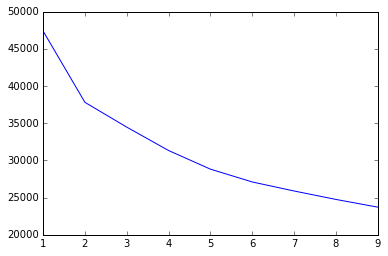

In [1147]:
#Look for the elbow

x = []
y = []
for n in range(1,10):
    km = KMeans(n_clusters=n)
    km.fit(X_train)
    x.append(n)
    y.append(km.inertia_)
plt.plot(x, y)

In [1148]:
#n=2

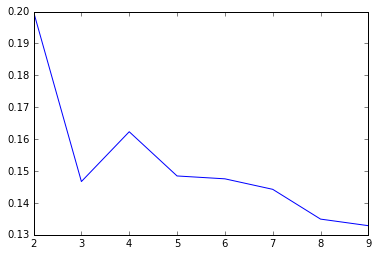

In [1149]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been assigned to the wrong cluster, 
# as a different cluster is more similar.

from sklearn.metrics import silhouette_score

x = []
y = []

for n in range(2,10):
    km = KMeans(n_clusters=n)
    centers = km.fit_predict(X_train)
    x.append(n)
    y.append(silhouette_score(X_train,centers))
    
plt.plot(x, y)

In [1150]:
#Two cluster centers confirmed!

#Pick k=2 based on silhouette score and elbow method

In [1151]:
km = KMeans(n_clusters=2)
km.fit(X_train)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
columns = {str(x): stdsc.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=X.columns)

,0,1
fixed acidity,8.887,7.879
volatile acidity,0.541,0.521
residual sugar,3.479,1.814
chlorides,0.104,0.074
total sulfur dioxide,66.404,31.383
density,0.998,0.995
pH,3.267,3.346
sulphates,0.669,0.649
alcohol,9.666,11.005
type,0.914,0.915


In [1152]:
wine2=pd.DataFrame(columns, index=X.columns)

In [1153]:
wine2

,0,1
fixed acidity,8.887,7.879
volatile acidity,0.541,0.521
residual sugar,3.479,1.814
chlorides,0.104,0.074
total sulfur dioxide,66.404,31.383
density,0.998,0.995
pH,3.267,3.346
sulphates,0.669,0.649
alcohol,9.666,11.005
type,0.914,0.915


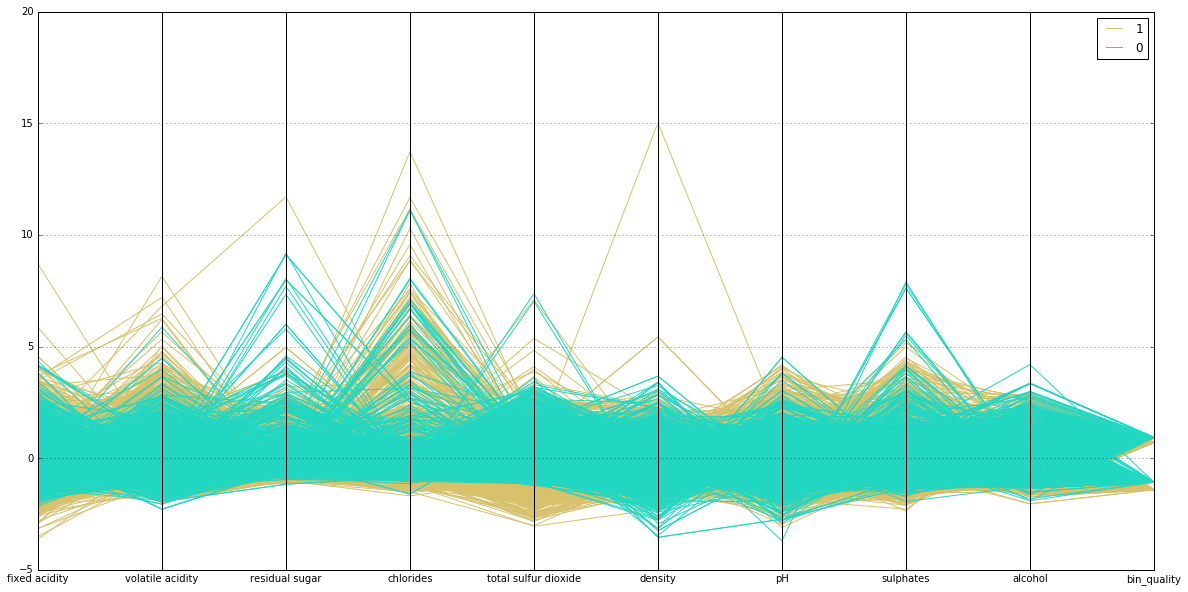

In [1154]:
plt.figure(figsize=(20,10))
pd.tools.plotting.parallel_coordinates(wine, 'type')

Looks like the clustering distinguishes two types - red wine and white wine.